In [ ]:
# Link to my Github repositry: https://github.com/Omar-HA-Issa/ML-fundamentals-2025

## Task 1: Exploratory Data Analysis

Dataset loaded: 17379 rows, 17 columns
Missing values: 0

Target Variable (cnt) Statistics:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64
Skewness: 1.28

Outlier Analysis:
Number of outliers: 505 (2.91% of data)


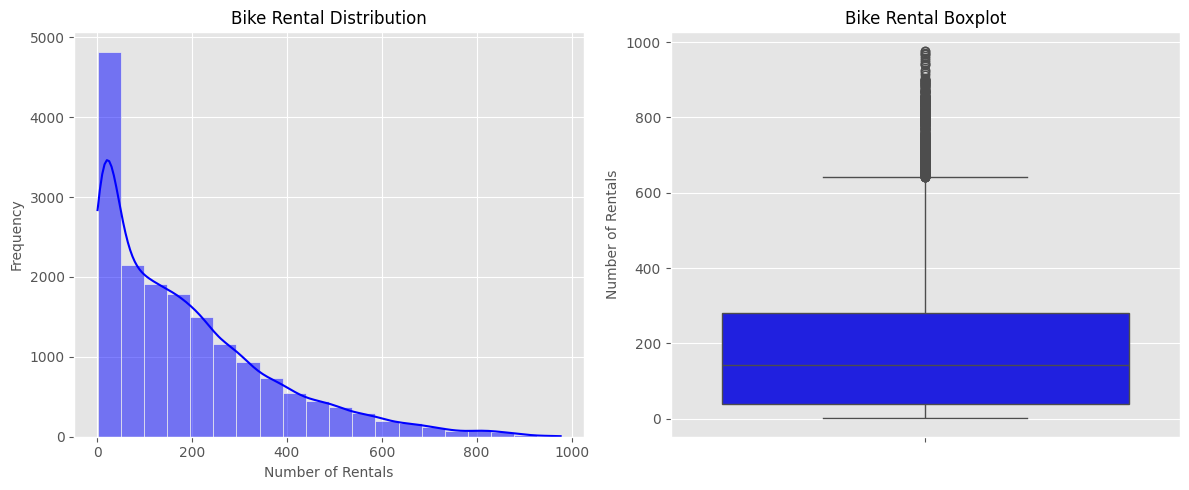

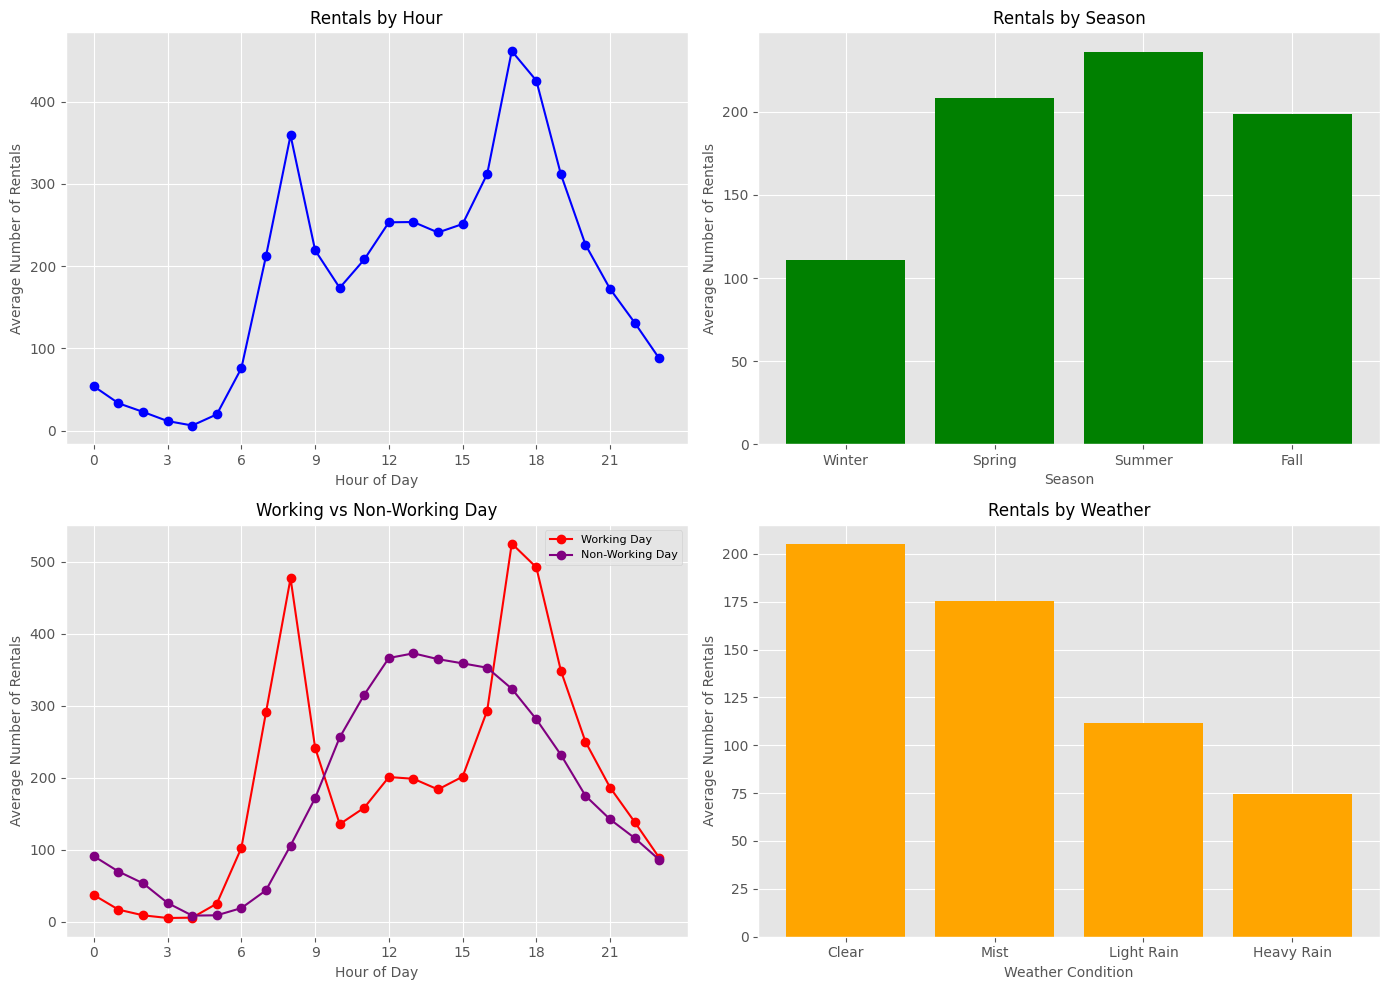

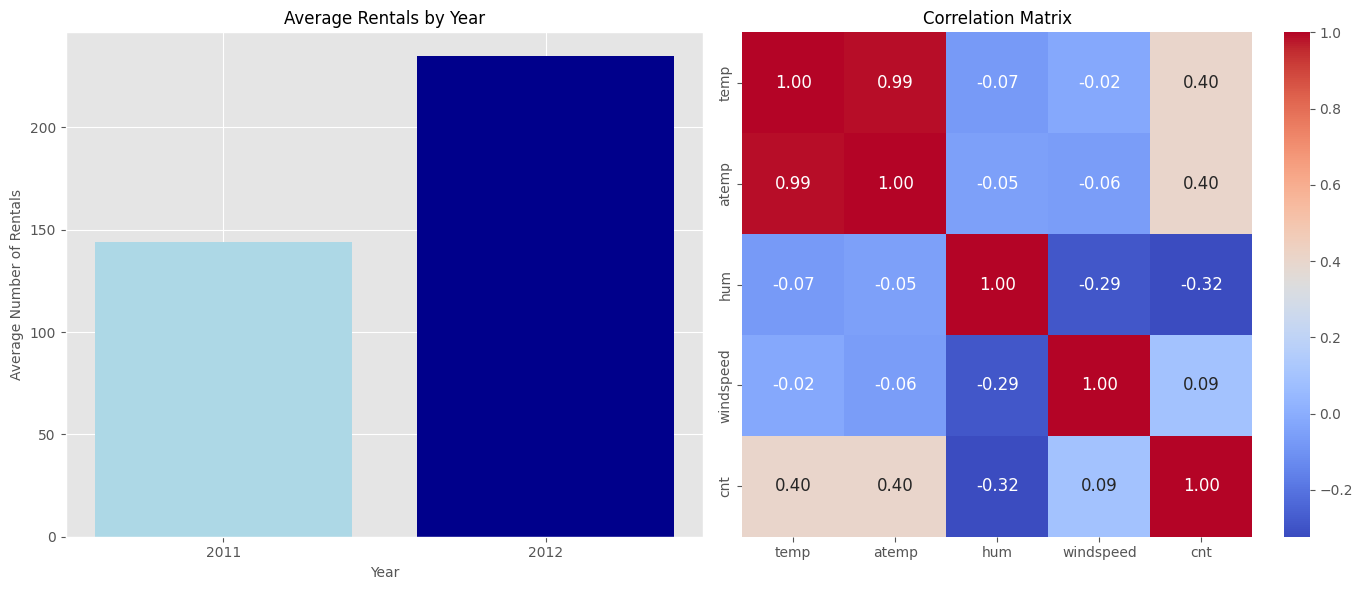

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r'C:\Users\Omar Issa\Downloads\hour.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()}")

# Setting a style and figure size
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.labelsize'] = 10 
plt.rcParams['axes.titlesize'] = 12  

# 1. Target variable and Outlier analysis:
print("\nTarget Variable (cnt) Statistics:")
print(df['cnt'].describe())
print(f"Skewness: {df['cnt'].skew():.2f}") 

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print("\nOutlier Analysis:")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}% of data)")

# Creating basic visualization of target variable
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], bins=20, kde=True, color='blue')
plt.title('Bike Rental Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['cnt'], color='blue')
plt.title('Bike Rental Boxplot')
plt.ylabel('Number of Rentals')
plt.tight_layout()
plt.show()

# 2. Temporal patterns:
plt.figure(figsize=(14, 10))

# Hour:
plt.subplot(2, 2, 1)
hourly = df.groupby('hr')['cnt'].mean()
plt.plot(hourly.index, hourly.values, 'o-', color='blue')
plt.title('Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 24, 3))

# Season:
plt.subplot(2, 2, 2)
season_avg = df.groupby('season')['cnt'].mean()
plt.bar(season_avg.index, season_avg.values, color='green')
plt.title('Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])

# Working Day Comparison:
plt.subplot(2, 2, 3)
work = df[df['workingday'] == 1].groupby('hr')['cnt'].mean()
non_work = df[df['workingday'] == 0].groupby('hr')['cnt'].mean()
plt.plot(work.index, work.values, 'o-', label='Working Day', color='red')
plt.plot(non_work.index, non_work.values, 'o-', label='Non-Working Day', color='purple')
plt.title('Working vs Non-Working Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 24, 3))
plt.legend(fontsize=8)  # Smaller legend

# Weather:
plt.subplot(2, 2, 4)
weather_avg = df.groupby('weathersit')['cnt'].mean()
plt.bar(weather_avg.index, weather_avg.values, color='orange')
plt.title('Rentals by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')
plt.xticks([1, 2, 3, 4], ['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])

plt.tight_layout()
plt.show()

# 3. Key weather relationships and year comparison:
plt.figure(figsize=(14, 6))

# Correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), 
            annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 12}) 
plt.title('Correlation Matrix')

# Year comparison visualization
plt.subplot(1, 2, 1)
year_avg = df.groupby('yr')['cnt'].mean()
bars = plt.bar([0, 1], year_avg, color=['lightblue', 'darkblue'])
plt.xticks([0, 1], ['2011', '2012'])
plt.title('Average Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Rentals')

plt.tight_layout()
plt.show()

## *Task 1 Remarks:* 

### Selected Visualizations

1. **Target Distribution & Boxplot**: To understand the distribution of rentals and identify potential outliers. The right-skewed nature of the data is important for model selection and possible transformations.

2. **Temporal Patterns (Subplots)**:
   * Hourly rentals pattern shows clear usage peaks during commute hours.
   * Seasonal variation reveals higher demand in warmer months.
   * Working vs non-working day comparison reveals distinct behavioral patterns.
   * Weather impact demonstrates how environmental conditions affect rentals.

3. **Correlation Matrix**: A single comprehensive visualization that efficiently shows relationships between all numeric variables, helping identify which features have the strongest predictive potential.

### Key Findings

1. **Target Distribution**: The bike rental count is right-skewed (skewness > 0), with approximately 2.9% of the data points identified as potential outliers. This suggests the utilization of transformations or models robust to skewed data.

2. **Temporal Patterns**:
   * Peak rental hours are at 8 AM and 5-6 PM, aligned with typical commute times of people.
   * Summer has the highest rental average, followed by Spring, then Fall, then Winter.
   * Clear weather is strongly associated with higher rental counts.


3. **Feature Relationships**:
   * Temperature shows a moderate positive correlation (0.40) with rental count.
   * Humidity shows a moderate negative correlation (-0.32) with rental count.
   * Windspeed has negligible correlation (0.09) with rental count.
   * Temperature and feeling temperature (temp-atemp) are highly correlated (0.99), suggesting one can be dropped.

4. **Year-over-Year Growth**: 2012 shows higher average rentals than 2011, indicating strong growth in bike sharing usage.

   

## Task 2: Data Splitting

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Dropping the non-predictive columns
df_clean = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Define features (X) and target (y) variables
X = df_clean.drop('cnt', axis=1)  # All columns except the target
y = df_clean['cnt']               # Target variable

# Splitting data into training + validation, and test sets (80/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Splitting the temp set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

# Printing the sets
print("Dataset samples:")
print(f"Original: {df.shape[0]} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/df.shape[0]*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/df.shape[0]*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/df.shape[0]*100:.1f}%)")


Dataset samples:
Original: 17379 samples
Training set: 10427 samples (60.0%)
Validation set: 3476 samples (20.0%)
Test set: 3476 samples (20.0%)


## *Task 2 Remarks:*

### Explination and justification of the data splitting process:

- The columns *'instant'*, *'dteday'*, *'casual'*, *'registered'* were dropped as requested to avoid any data leakage.
- The dataset was split using a 60-20-20 split. Where 60% of the data was split into training and 20% into validation and the final 20% into test. This spit was followed to provide sufficient data for learning patterns, tuning hyperparameters, and conducting an unbiased final evaluation.
- A temp set was created to provide a clean separation in data splitting, ensuring the test set remains completely untouched during model development and preventing potential data leakage.

## *Task 3: Feature Engineering*